# Lead scoring case study

## Problem Statement

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Setting row and column display 
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
#Loading data
df=pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1. Data Cleaning and Null value Imputation

In [4]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Getting data description
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Replacing Select as Null in the data frame
Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value 

In [6]:
#Replacing select with null values
df=df.replace("Select",np.nan)

In [7]:
#checking for null values
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#Dropping columns with greater than 70% Null values
df=df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)),2)>70)].columns,axis=1)

In [9]:
#Checking null value percentage count
round((df.isnull().sum()/len(df))*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

#### Treating null values in Lead Quality
We see that although Lead Quality has null values over 51%, there is a column "Not Sure" to which we could assign these null values could be assigned.

In [10]:
#Checking Lead quality value counts
df["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [11]:
#Replacing NaN values with Not sure
df["Lead Quality"]=df["Lead Quality"].replace(np.nan,"Not Sure")

In [12]:
#checking column after null value cleaning
df["Lead Quality"].value_counts()

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

#### Treating null values in column Country


In [13]:
#Checking null values in country column
print("Count of null values:",df.Country.isnull().sum())
      

Count of null values: 2461


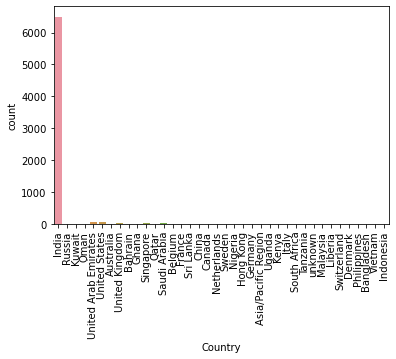

In [14]:
p1=sns.countplot("Country",data=df)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [15]:
#Dropping Country column as imputing the null values to India would cause data imbalance.
#Creating Columns_drop to store columns which has to be dropped.
columns_drop=["Country"]

####  Treating null values in column Specialization

In [16]:
print("Count of null values is : ",df["Specialization"].isnull().sum())
df["Specialization"].value_counts()

Count of null values is :  3380


Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [17]:
#We see that there are around 36% null values hence we'll be assigning a new value "Other"

#Replacing NaN values with Not sure
df["Specialization"]=df["Specialization"].replace(np.nan,"Other courses")

In [18]:
df["Specialization"].value_counts()

Other courses                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

####  Treating null values in current occupation

In [19]:
print("Count of null values is : ",df["What is your current occupation"].isnull().sum())
df["What is your current occupation"].value_counts()

Count of null values is :  2690


Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
#We see that for most records the occupation is listed as unemployed hence we'd be imputing null values to the same.
df["What is your current occupation"]=df["What is your current occupation"].replace(np.nan,"Unemployed")


####  Treating null values in "What matters most to you in choosing a course" column

In [21]:
print("Count of null values is : ",df["What matters most to you in choosing a course"].isnull().sum())
df["What matters most to you in choosing a course"].value_counts()

Count of null values is :  2709


Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
#As per the value count check we see over 99% values are for Better Career Prospects.
#We'll drop this column as this column as it is imbalanced
columns_drop.append("What matters most to you in choosing a course")

####  Treating null values in "Tags" column

In [23]:
print("Count of null values is : ",df["Tags"].isnull().sum())
df["Tags"].value_counts()

Count of null values is :  3353


Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [24]:
#Imputing null values to "Will revert after reading the email"
df["Tags"]=df["Tags"].replace(np.nan,"Will revert after reading the email")


####  Treating null values in "City" column

In [25]:
print("Count of null values is : ",df["City"].isnull().sum())
df["City"].value_counts()

Count of null values is :  3669


Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [26]:
#Imputing null values with "Mumbai"
df["City"]=df["City"].replace(np.nan,"Mumbai")

####  Treating null values in "Asymmetrique Activity Index" and "Asymmetrique Profile Index"

In [27]:
print("Count of null values in Asymmetrique Activity Index : ",df["Asymmetrique Activity Index"].isnull().sum())
print(df["Asymmetrique Activity Index"].value_counts())
print("Count of null values in Asymmetrique Profile Index : ",df["Asymmetrique Profile Index"].isnull().sum())
print(df["Asymmetrique Profile Index"].value_counts())


Count of null values in Asymmetrique Activity Index :  4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64
Count of null values in Asymmetrique Profile Index :  4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


We'd be dropping both these columns as imputing the null values would create vast variations hence its not ideal to do that. 

In [28]:
columns_drop.append("Asymmetrique Profile Index")
columns_drop.append("Asymmetrique Activity Index")

####  Treating null values in "Asymmetrique Activity Score" and "Asymmetrique Profile Score"

In [29]:
print("Count of null values in Asymmetrique Activity Score : ",df["Asymmetrique Activity Score"].isnull().sum())
print(df["Asymmetrique Activity Score"].value_counts())
print("Count of null values in Asymmetrique Profile Score : ",df["Asymmetrique Profile Score"].isnull().sum())
print(df["Asymmetrique Profile Score"].value_counts())

Count of null values in Asymmetrique Activity Score :  4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64
Count of null values in Asymmetrique Profile Score :  4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64


We'd be dropping both these columns as imputing the null values would create vast variations hence its not ideal to do that. 

In [30]:
columns_drop.append("Asymmetrique Activity Score")
columns_drop.append("Asymmetrique Profile Score")

In [31]:
columns_drop

['Country',
 'What matters most to you in choosing a course',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [32]:
#dropping columns which were added to drop_column
df=df.drop(columns_drop,1)

In [33]:
df.isnull().sum()/len(df)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.

#### Treating null values less than 2%
we'll be dropping the columns having null value count of less than 2%


In [34]:
#checking for null values
df.dropna(inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9074 non-null   object 
 1   Lead Number                               9074 non-null   int64  
 2   Lead Origin                               9074 non-null   object 
 3   Lead Source                               9074 non-null   object 
 4   Do Not Email                              9074 non-null   object 
 5   Do Not Call                               9074 non-null   object 
 6   Converted                                 9074 non-null   int64  
 7   TotalVisits                               9074 non-null   float64
 8   Total Time Spent on Website               9074 non-null   int64  
 9   Page Views Per Visit                      9074 non-null   float64
 10  Last Activity                       

In [36]:
#Checking duplicates in Prospect ID and Lead Number column
print("Are there any duplicates in Prospect ID column :",df.duplicated(subset=['Prospect ID']).any())
print("Are there any duplicates in Lead number column :",df.duplicated(subset=['Lead Number']).any())


Are there any duplicates in Prospect ID column : False
Are there any duplicates in Lead number column : False


Since both Prospect ID and Lead number columns are unique we can drop one of them.

In [37]:
#Dropping Lead Number column
df=df.drop("Lead Number",axis=1)

In [38]:
#Checking value counts of Lead Source column
print(df["Lead Source"].value_counts())

#Google has been mentioned twice hence we'll be imputing both  
df["Lead Source"]=df["Lead Source"].replace("google","Google")

#we'll be merging the sources with insignificant number of leads as other sources
df["Lead Source"]=df["Lead Source"].replace(['Click2call', 'Live Chat',
       'NC_EDM', 'Pay per Click Ads',
       'Press_Release', 'Social Media',
       'WeLearn',  'bing', 'blog', 'testone',
       'welearnblog_Home', 'youtubechannel',"Facebook"],"Other source")

Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
Pay per Click Ads       1
WeLearn                 1
welearnblog_Home        1
NC_EDM                  1
testone                 1
blog                    1
youtubechannel          1
Name: Lead Source, dtype: int64


In [39]:
#Checking valuecounts in Current Occupation
print(df["What is your current occupation"].value_counts())
#Replacing Businessman and Housewife with "Other".
df["What is your current occupation"]=df["What is your current occupation"].replace(['Businessman',"Housewife"],"Other")

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64


In [40]:
#Checking value counts of Last Notable Activity column
print(df["Last Notable Activity"].value_counts())

#Grouping Last notable activity with value count below 1000 as "Other"
df["Last Notable Activity"]=df["Last Notable Activity"].replace(['Approached upfront', 'Email Bounced', 'Email Link Clicked',
       'Email Marked Spam','Email Received',
       'Form Submitted on Website', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Page Visited on Website',
       'Resubscribed to emails','Unreachable',
       'Unsubscribed', 'View in browser link Clicked'],"Other")

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


In [41]:
#Checking Value counts of Tags column
print(df["Tags"].value_counts())

#Merging values with count lesser than 300 to "Other Reasons"
      
df["Tags"]=df["Tags"].replace([
       'Diploma holder (Not Eligible)',
       'In confusion whether part time or DLP',
        'Interested in Next batch',
       'Lateral student',
       'Lost to Others',
       'Recognition issue (DEC approval)',
       'Shall take in the next coming month', 'Still Thinking',
       'University not recognized',
       'Want to take admission but has financial problems',
        'in touch with EINS',
       'invalid number', 'number not provided', 'opp hangup',
        'wrong number given',"Graduation in progress","Not doing further education","Interested  in full time MBA","Busy","Lost to EINS"],"Other Reasons")

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

In [42]:
#Merging Last Activities which had comparitively lesser number of leads
df["Last Activity"]=df["Last Activity"].replace(['Approached upfront',
       'Email Link Clicked', 'Email Marked Spam',
       'Email Received', 'Form Submitted on Website',
       'Had a Phone Conversation',
       'Resubscribed to emails',
       'Unreachable', 'Unsubscribed', 'View in browser link Clicked',
       'Visited Booth in Tradeshow',"Email Bounced"],"Other Activity")

### 2. Exploratory Data Analysis

### Univariate Analysis on Categorical variables

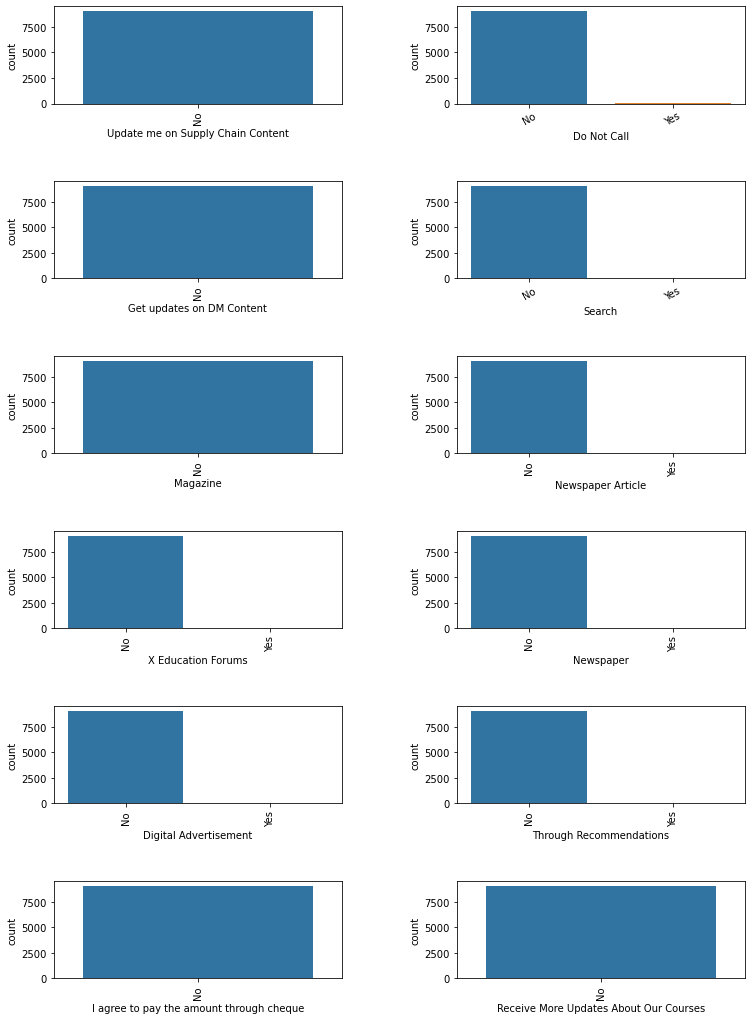

In [43]:
# Doing univariate analysis on variables in which we saw data Imbalance
fig, axs = plt.subplots(6,2, figsize = (12,15))
plt.subplots_adjust(left=0.1,
                    bottom=0.00, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.8)


p1=sns.countplot("Update me on Supply Chain Content",data=df,ax=axs[0,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

p1=sns.countplot('Do Not Call',data=df,ax=axs[0,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=30)

p1=sns.countplot("Get updates on DM Content",data=df,ax=axs[1,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

p1=sns.countplot('Search',data=df,ax=axs[1,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=30)

p1=sns.countplot('Magazine',data=df,ax=axs[2,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


p1=sns.countplot('Newspaper Article',data=df,ax=axs[2,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)



p1=sns.countplot('X Education Forums',data=df,ax=axs[3,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


p1=sns.countplot('Newspaper',data=df,ax=axs[3,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


p1=sns.countplot('Digital Advertisement',data=df,ax=axs[4,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


p1=sns.countplot('Through Recommendations',data=df,ax=axs[4,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)



p1=sns.countplot('I agree to pay the amount through cheque',data=df,ax=axs[5,0])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


p1=sns.countplot('Receive More Updates About Our Courses',data=df,ax=axs[5,1])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)


plt.show()

#### Inference

We could see all the variables visualized above had data imbalance that is one factor contributed nearly 90-100% of the total data and including such variables could affect our analysis hence these columns would be dropped.

-  Do Not Call
-  Do Not Email
-  Search
-  Magazine          
-  Newspaper Article
-  X Education Forums
-  Newspaper
-  Digital Advertisement
-  Through Recommendations
-  Receive More Updates About Our Courses
-  Update me on Supply Chain Content
-  Get updates on DM Content
-  I agree to pay the amount through cheque


In [44]:
#Dropping the imbalanced columns
df=df.drop(["Do Not Call","Do Not Email","Search","Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
            "Through Recommendations","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"],axis=1)

#### 1.Lead Source 

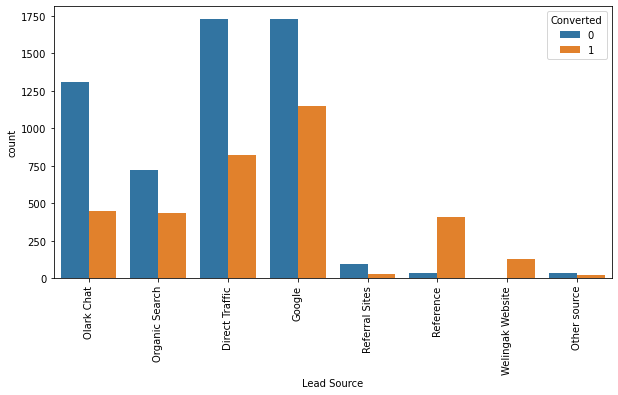

In [45]:
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Lead Source"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference:
We could see that the reference and Welingak website has more conversion rate although the total leads were less, so we should be focusing on these sources. Google and Direct Traffic also has high conversion rates, so we should be increasing presence through advertisements in these sources.

#### 2. Lead Origin

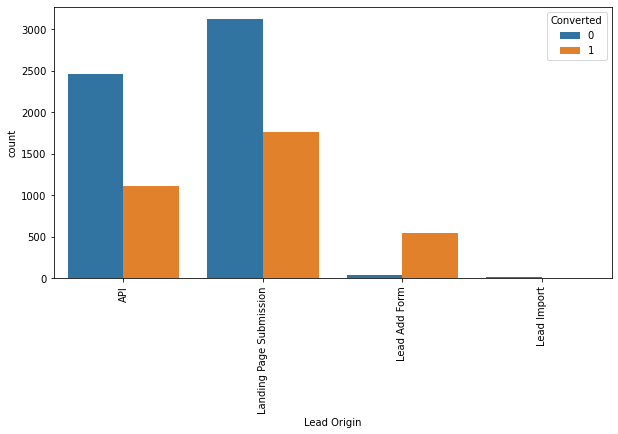

In [46]:
#Conversion based on Lead Origin
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Lead Origin"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
We could see from the above that the Lead generated from Add form has the highest conversion rate even though the leads are less.

#### 3.Last Activity 

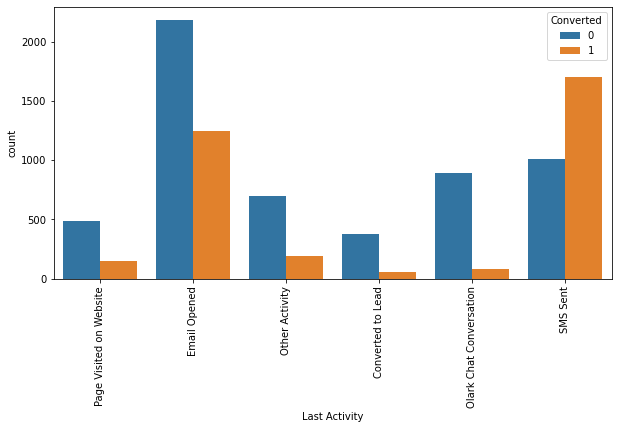

In [47]:
#Conversion based on Last Activity
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Last Activity"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

Email opened has the highest leads however the conversion rate is lower when compare to SMS sent in which the leads are less but the conversion rate is very high.

#### 4. Tags 

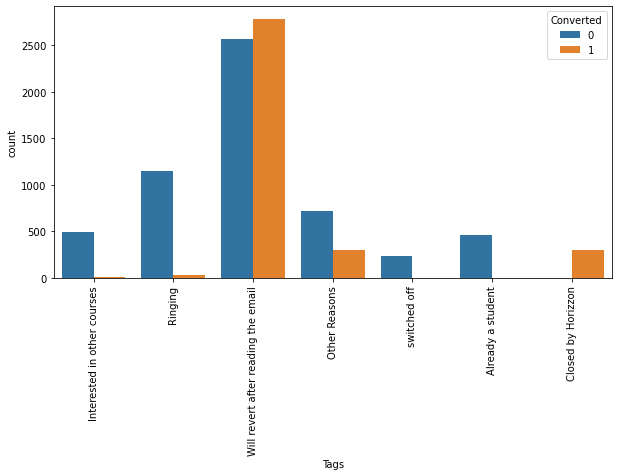

In [48]:
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Tags"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference:

We could see that most leads who replied "Will revert after reading the Email has high conversion rate and the leads who are already a student has very less conversion rate.

#### 5. What is your current occupation 

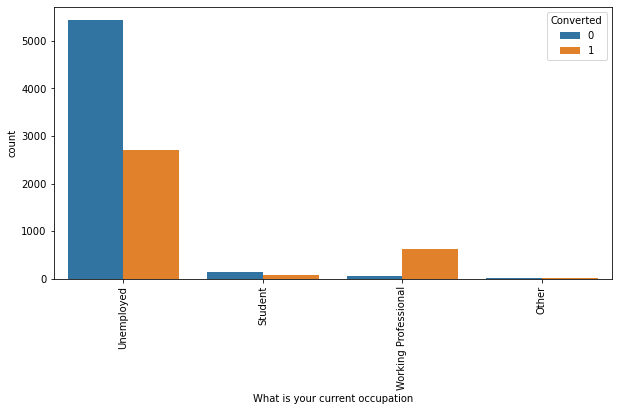

In [49]:
plt.figure(figsize=(10,5))
p1=sns.countplot(df["What is your current occupation"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
We should be focusing more on working professionals as they've a higher conversion rate.

#### 6.Lead Quality 

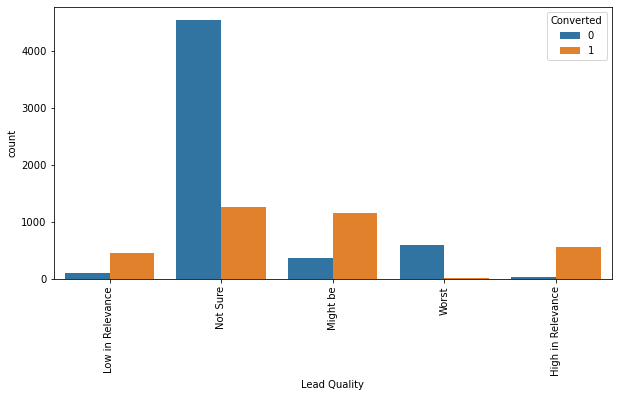

In [50]:
#Conversion rates based on Lead Quality
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Lead Quality"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
 We'd categorized certain leads as Low relevance however the conversion rates for those have been quite high hence we should try to look indepth and try to change criteria for marking leads as Low relevance.

####  7.Free copy of Mastering The Interview 

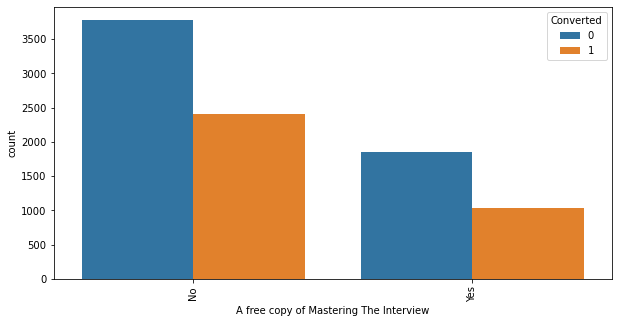

In [51]:
#Conversion rates based on free copy of Mastering The Interview"
plt.figure(figsize=(10,5))
p1=sns.countplot(df["A free copy of Mastering The Interview"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

We could see more leads had selected No for Free copy of mastering interview so maybe the company to strategize new products/services for prospective customers.

#### 8.Last Notable Activity 

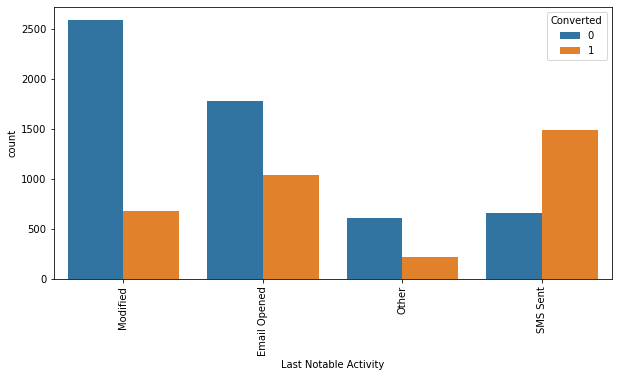

In [52]:
#Conversion rates based on Last Notable Activity"
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Last Notable Activity"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
We see that the sms sent has higher conversion than the rest of last notable activities.

#### 9.City

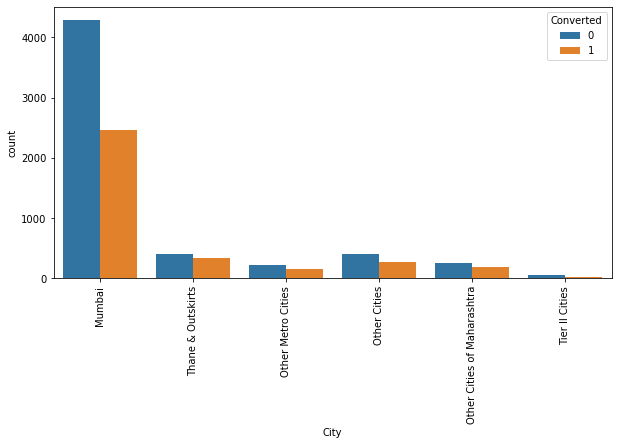

In [53]:
#Conversion rates based on City
plt.figure(figsize=(10,5))
p1=sns.countplot(df["City"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

#### 10.Specialization

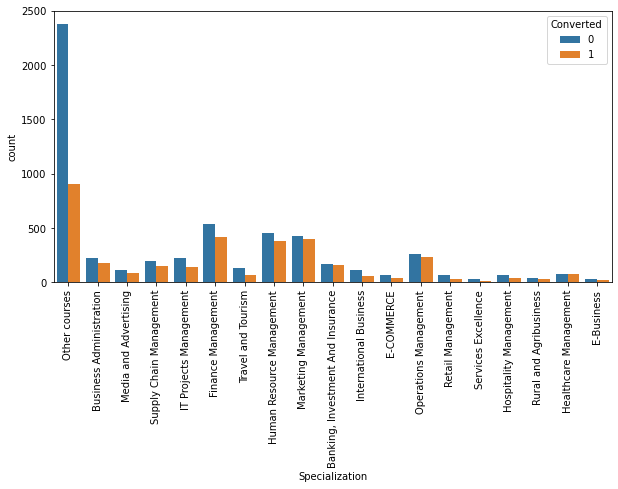

In [54]:
#Conversion rates based on Specialization
plt.figure(figsize=(10,5))
p1=sns.countplot(df["Specialization"], hue=df["Converted"])
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
plt.show()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

### Univariate analysis on Numerical variables

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [57]:
df.shape

(9074, 15)

#### Total Visits

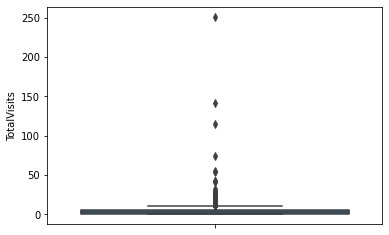

In [58]:
#Visualizing numerical variable Total Visits
sns.boxplot(y="TotalVisits",data=df)
plt.show()

In [59]:
#Checking percentile values of column Totalvisits
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

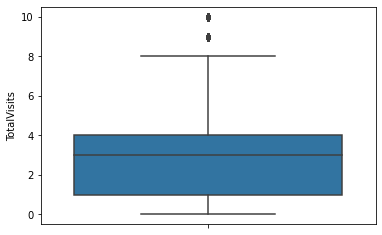

In [60]:
#Outlier treatment- we'd be keeping the cap as 95 percentile.

Quart1 = df.TotalVisits.quantile(0.95)
Quart2 = df.TotalVisits.quantile(0.00)
df = df[(df.TotalVisits <= Quart1) & (df.TotalVisits >= Quart2)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [61]:
df.shape

(8721, 15)

#### Total Time Spent on Website 


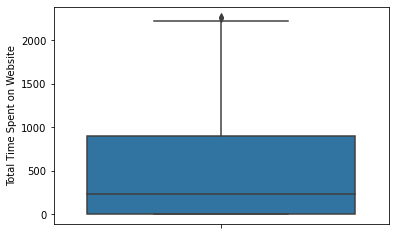

In [62]:
#Visualizing Total Time Spent on Website.
sns.boxplot(y="Total Time Spent on Website",data=df)
plt.show()

In [63]:
#checking percentile values for column Total Time Spent on Website
df['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
5%          0.000000
25%         2.000000
50%       236.000000
75%       899.000000
90%      1366.000000
95%      1551.000000
99%      1826.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

#### Page Views Per Visit

In [64]:
#checking percentile values for column Page Views Per Visit
df['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    8721.000000
mean        2.255668
std         1.922397
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         8.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

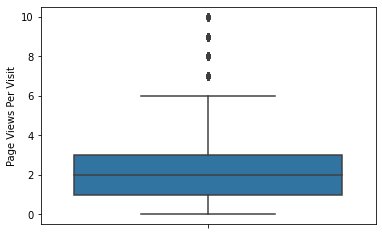

In [65]:
#visualizing Page Views Per Visit
sns.boxplot(y="Page Views Per Visit",data=df)
plt.show()

For Page Views Per Visit and Total Time Spent on Website we didnt do any outlier treatment as the outliers arent that high.

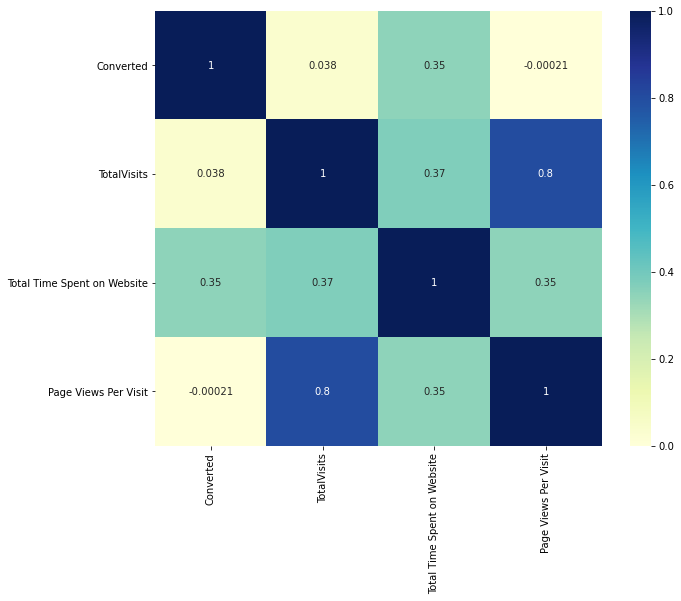

In [66]:
# Checking for Correlation between the numerical variables
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

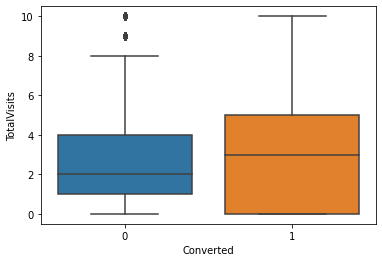

In [67]:
#Visualizing converted and TotalVisits.
sns.boxplot(y="TotalVisits",x="Converted",data=df)
plt.show()

#### Inference
The median visits for converted leads is higher than the non converted leads.

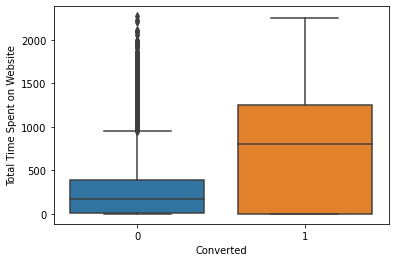

In [68]:
#Visualizing converted and Total Time Spent on Website.
sns.boxplot(y="Total Time Spent on Website",x="Converted",data=df)
plt.show()

#### Inference
The median Time spend for converted leads is much higher than the non converted leads.

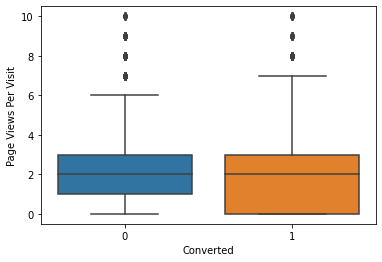

In [69]:
#Visualizing converted and Page Views Per Visit.
sns.boxplot(y="Page Views Per Visit",x="Converted",data=df)
plt.show()

#### Inference
The median for converted leads is same as the non converted leads.

## 3. Data Preparation and Feature scaling

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8721 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             8721 non-null   object 
 1   Lead Origin                             8721 non-null   object 
 2   Lead Source                             8721 non-null   object 
 3   Converted                               8721 non-null   int64  
 4   TotalVisits                             8721 non-null   float64
 5   Total Time Spent on Website             8721 non-null   int64  
 6   Page Views Per Visit                    8721 non-null   float64
 7   Last Activity                           8721 non-null   object 
 8   Specialization                          8721 non-null   object 
 9   What is your current occupation         8721 non-null   object 
 10  Tags                                    8721 non-null   obje

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [71]:
cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

In [72]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)

In [73]:
df=df.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'City', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],1)

#### Train Test split

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
# Putting feature variable to X
X = df.drop(['Converted','Prospect ID'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other courses,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Reasons,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [76]:
# Putting response variable to y
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [77]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [78]:
#Importing standardscaler for feature scaling
from sklearn.preprocessing import StandardScaler


In [79]:
#Feature scaling on the required variables
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other courses,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Reasons,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Other,Last Notable Activity_SMS Sent
7220,0.436186,2.091938,0.918347,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0
3383,0.028331,0.230687,0.391804,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
770,0.436186,-0.244329,0.918347,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1
5785,-1.195236,-0.876452,-1.187826,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
5252,1.251898,-0.464278,-0.134740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [80]:
#Checking current Conversion Rate
Conv_rate = (sum(df['Converted'])/len(df['Converted'].index))*100
Conv_rate

37.495700034399725

The current conversion rate is 37.49% currently

## 4. Model Building

In [81]:
import statsmodels.api as sm

In [82]:
#Importing Logistic regression from library
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
#Using RFE selecting 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [83]:
#Ranking the columns
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 20),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 19),
 ('Lead Origin_Landing Page Submission', False, 11),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Lead Source_Google', False, 31),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 30),
 ('Lead Source_Other source', False, 35),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Opened', False, 16),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Activity', False, 32),
 ('Last Activity_Page Visited on Website', False, 23),
 ('Last Activity_SMS Sent', False, 4),
 ('Specialization_Business Administration', False, 33),
 ('Specialization_E-Business', False, 12),
 ('Specialization_E-COMMERCE', False, 9),
 ('Specialization_Finance Management', False, 22),
 ('Specialization_Healthcare Management

In [84]:
#Creating variable cols to store RFE selected 15 variables
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Reasons', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [85]:
#Model 1

X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6088
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1561.1
Date:                Wed, 13 Oct 2021   Deviance:                       3122.3
Time:                        22:14:48   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6087      0.732     -3.564      0.000      -4.043      -1.174
Total Time Spent on Website                              1.0885      0.054     20.150      0.000       0.983       1.194
Lead Origin_Lead Add Form                                2.1925      0.339      6.476      0.000       1.529       2.856
Lead Source_Olark Chat                                   1.2503      0.132      9.483      0.000       0.992       1.509
Lead Source_Welingak Website                             3.9566      1.069      3.701      0.000       1.861       6.052
Last Activity_Olark Chat Conversation                   -1.4117      0.194     -7.283      0.000      -1.792      -1.032
What is your current occupation_Working Professional     1.2696      0.262      4.852      0.000       0.757       1.782
Tags_Closed by Horizzon                                  8.4606      1.260      6.717      0.000       5.992      10.930
Tags_Interested in other courses                        -0.2116      0.823     -0.257      0.797      -1.825       1.402
Tags_Other Reasons                                       3.0942      0.737      4.201      0.000       1.651       4.538
Tags_Ringing                                            -1.0692      0.774     -1.382      0.167      -2.586       0.447
Tags_Will revert after reading the email                 3.6705      0.732      5.017      0.000       2.237       5.104
Tags_switched off                                       -2.6917      1.088     -2.473      0.013      -4.825      -0.559
Lead Quality_Not Sure                                   -2.7139      0.118    -22.949      0.000      -2.946      -2.482
Lead Quality_Worst                                      -4.3924      0.444     -9.895      0.000      -5.262      -3.522
Last Notable Activity_SMS Sent                           2.2796      0.119     19.192      0.000       2.047       2.512
========================================================================================================================
"""

In [86]:
# importing VIF from library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [87]:
# checking VIF of the feature variables
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead Quality_Not Sure,3.95
10,Tags_Will revert after reading the email,3.72
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.79
9,Tags_Ringing,1.70
14,Last Notable Activity_SMS Sent,1.54
8,Tags_Other Reasons,1.47
4,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.39
3,Lead Source_Welingak Website,1.35


In [88]:
# Dropping Lead Origin_Lead Add Form as it has high P value and VIF.
cols=cols.drop("Tags_Interested in other courses",1)

In [89]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Other Reasons', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [90]:
# Model 2
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6089
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1561.2
Date:                Wed, 13 Oct 2021   Deviance:                       3122.3
Time:                        22:14:48   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7773      0.350     -7.943      0.000      -3.463      -2.092
Total Time Spent on Website                              1.0880      0.054     20.154      0.000       0.982       1.194
Lead Origin_Lead Add Form                                2.1908      0.338      6.477      0.000       1.528       2.854
Lead Source_Olark Chat                                   1.2501      0.132      9.481      0.000       0.992       1.509
Lead Source_Welingak Website                             3.9576      1.069      3.703      0.000       1.863       6.053
Last Activity_Olark Chat Conversation                   -1.4121      0.194     -7.286      0.000      -1.792      -1.032
What is your current occupation_Working Professional     1.2667      0.261      4.849      0.000       0.755       1.779
Tags_Closed by Horizzon                                  8.6285      1.085      7.953      0.000       6.502      10.755
Tags_Other Reasons                                       3.2623      0.363      8.986      0.000       2.551       3.974
Tags_Ringing                                            -0.8997      0.425     -2.117      0.034      -1.733      -0.067
Tags_Will revert after reading the email                 3.8390      0.350     10.976      0.000       3.154       4.525
Tags_switched off                                       -2.5218      0.874     -2.885      0.004      -4.235      -0.809
Lead Quality_Not Sure                                   -2.7133      0.118    -22.949      0.000      -2.945      -2.482
Lead Quality_Worst                                      -4.3846      0.443     -9.894      0.000      -5.253      -3.516
Last Notable Activity_SMS Sent                           2.2787      0.119     19.199      0.000       2.046       2.511
========================================================================================================================
"""

In [91]:
#Checking VIF of model 2
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Lead Quality_Not Sure,3.45
9,Tags_Will revert after reading the email,3.36
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.78
8,Tags_Ringing,1.62
13,Last Notable Activity_SMS Sent,1.53
4,Last Activity_Olark Chat Conversation,1.44
7,Tags_Other Reasons,1.39
0,Total Time Spent on Website,1.38
3,Lead Source_Welingak Website,1.35


In [92]:
#Dropping Tags_Interested in other courses as it has a high P value
cols=cols.drop("Tags_Ringing",1)

In [93]:
cols

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Tags_Closed by Horizzon', 'Tags_Other Reasons',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [94]:
#Model 3
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6104
Model:                            GLM   Df Residuals:                     6090
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1563.3
Date:                Wed, 13 Oct 2021   Deviance:                       3126.5
Time:                        22:14:49   Pearson chi2:                 1.03e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4099      0.220    -15.527      0.000      -3.840      -2.979
Total Time Spent on Website                              1.0901      0.054     20.207      0.000       0.984       1.196
Lead Origin_Lead Add Form                                2.1968      0.339      6.486      0.000       1.533       2.861
Lead Source_Olark Chat                                   1.2548      0.132      9.527      0.000       0.997       1.513
Lead Source_Welingak Website                             3.9525      1.069      3.698      0.000       1.858       6.047
Last Activity_Olark Chat Conversation                   -1.4157      0.194     -7.297      0.000      -1.796      -1.035
What is your current occupation_Working Professional     1.3279      0.265      5.008      0.000       0.808       1.848
Tags_Closed by Horizzon                                  9.2551      1.051      8.803      0.000       7.194      11.316
Tags_Other Reasons                                       3.8976      0.238     16.348      0.000       3.430       4.365
Tags_Will revert after reading the email                 4.4730      0.218     20.487      0.000       4.045       4.901
Tags_switched off                                       -1.8598      0.823     -2.258      0.024      -3.474      -0.246
Lead Quality_Not Sure                                   -2.7098      0.118    -22.980      0.000      -2.941      -2.479
Lead Quality_Worst                                      -4.3586      0.445     -9.803      0.000      -5.230      -3.487
Last Notable Activity_SMS Sent                           2.2402      0.117     19.217      0.000       2.012       2.469
========================================================================================================================
"""

In [95]:
#Checking VIF of model 3
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.61
10,Lead Quality_Not Sure,2.34
2,Lead Source_Olark Chat,1.85
1,Lead Origin_Lead Add Form,1.76
4,Last Activity_Olark Chat Conversation,1.43
12,Last Notable Activity_SMS Sent,1.40
0,Total Time Spent on Website,1.37
3,Lead Source_Welingak Website,1.34
7,Tags_Other Reasons,1.28
5,What is your current occupation_Working Profes...,1.26


In [96]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred.head()

7220    0.965888
3383    0.699512
770     0.581071
5785    0.997193
5252    0.380368
dtype: float64

In [97]:
#Reshaping y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.96588834, 0.69951174, 0.58107132, 0.99719252, 0.3803677 ,
       0.00151504, 0.13007746, 0.00179631, 0.0012976 , 0.98286391])

In [98]:
#Creating a new data frame with predicted probabilities and actual conversions
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.965888,7220
1,0,0.699512,3383
2,0,0.581071,770
3,1,0.997193,5785
4,1,0.380368,5252


In [99]:
#Creating a new column predicted with cut off as 0.5, if Converted_prob>0.5 then 1 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,1,0.965888,7220,1
1,0,0.699512,3383,1
2,0,0.581071,770,1
3,1,0.997193,5785,1
4,1,0.380368,5252,0


In [100]:
#Importing metrics from SKlearn
from sklearn import metrics

In [101]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3566  243]
 [ 369 1926]]


In [102]:
# Predicted     not_Converted    converted
# Actual
# not_Converted        3661      148
# converted            332       1963  

#### Accuracy Metrics with 0.5 as cut off

In [103]:
#Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8997378768020969


In [104]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity with 0.5 cut off

In [105]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8392156862745098

#### Specificity with 0.5 cut off

In [106]:
# Let us calculate specificity
TN / float(TN+FP)

0.9362037280126018

In [107]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06379627198739826


In [108]:
# positive predictive value 
print (TP / float(TP+FP))

0.8879668049792531


In [109]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9062261753494282


#### Plotting ROC

In [110]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [111]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

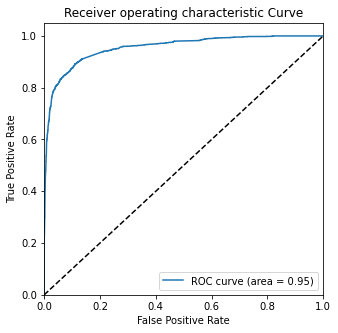

In [112]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We've a ROC curve area of .95 indicating a good predictive model.

 ### Finding Optimal Cutoff Point

In [113]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.965888,7220,1,1,1,1,1,1,1,1,1,1,1
1,0,0.699512,3383,1,1,1,1,1,1,1,1,0,0,0
2,0,0.581071,770,1,1,1,1,1,1,1,0,0,0,0
3,1,0.997193,5785,1,1,1,1,1,1,1,1,1,1,1
4,1,0.380368,5252,0,1,1,1,1,0,0,0,0,0,0


In [114]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.375983     1.000000     0.000000
0.1          0.1  0.773919     0.963399     0.659753
0.2          0.2  0.849443     0.936819     0.796797
0.3          0.3  0.888761     0.893682     0.885797
0.4          0.4  0.892366     0.871024     0.905224
0.5          0.5  0.899738     0.839216     0.936204
0.6          0.6  0.900393     0.800436     0.960620
0.7          0.7  0.894332     0.764706     0.972434
0.8          0.8  0.870413     0.685403     0.981885
0.9          0.9  0.840760     0.590414     0.991599


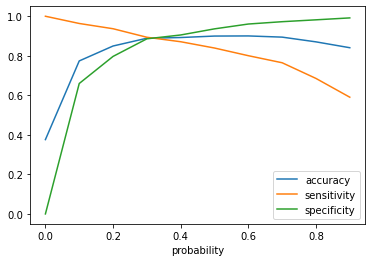

In [115]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above we could see that 0.3 is the optimum point to be taken as a cutoff probability.

In [116]:
#Setting the cutoff as 0.3 and determining Final predicted based on this cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head(10)

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.965888,7220,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.699512,3383,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.581071,770,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.997193,5785,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.380368,5252,0,1,1,1,1,0,0,0,0,0,0,1
5,0,0.001515,9123,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.130077,226,0,1,1,0,0,0,0,0,0,0,0,0
7,0,0.001796,6352,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0.001298,653,0,1,0,0,0,0,0,0,0,0,0,0
9,1,0.982864,2010,1,1,1,1,1,1,1,1,1,1,1,1


#### Accuracy with 0.3 cut off

In [117]:
#overall accuracy with 0.3 cut off
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8887614678899083

In [118]:
#Updating the confusion metrics as per 0.3 cutoff
confusion_updated = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_updated

array([[3374,  435],
       [ 244, 2051]], dtype=int64)

In [119]:
TP = confusion_updated[1,1] # true positive 
TN = confusion_updated[0,0] # true negatives
FP = confusion_updated[0,1] # false positives
FN = confusion_updated[1,0] # false negatives

#### Sensitivity with 0.3 cut off

In [120]:
# Sensitivity with cutoff as 0.3
TP / float(TP+FN)

0.893681917211329

#### Specificity with 0.3 cut off

In [121]:
# Specificity with cutoff as 0.3
TN / float(TN+FP)

0.8857967970595957

#### Precision with 0.3 cut off

In [122]:
#Precision score
print(TP / (TP + FP))


0.825020112630732


#### Recall with 0.3 cut off

In [123]:
#Recall score
print(TP / float(TP + FN))

0.893681917211329


#### Precision and recall tradeoff

In [124]:
from sklearn.metrics import precision_recall_curve

In [125]:
y_train_pred_final.Converted, y_train_pred_final.predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

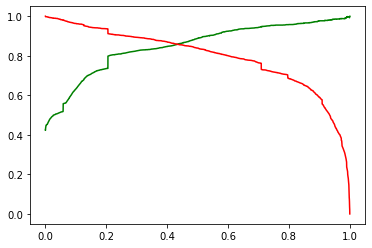

In [126]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [127]:
#Feature scaling on test set

X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])



In [128]:
X_test = X_test[cols]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Closed by Horizzon,Tags_Other Reasons,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
1105,-0.602901,0,0,0,0,0,0,0,1,0,1,0,0
5872,-0.876452,1,0,1,0,0,0,0,1,0,1,0,1
480,-0.876452,0,1,0,0,0,0,0,1,0,1,0,0
8055,-0.876452,1,0,0,0,1,0,0,1,0,0,0,1
8214,-0.876452,0,1,0,0,0,0,0,1,0,1,0,0


In [129]:
X_test_sm = sm.add_constant(X_test)

In [130]:
y_test_pred = res.predict(X_test_sm)

In [131]:
y_test_pred[:10]

1105    0.090797
5872    0.996943
480     0.206312
8055    0.997193
8214    0.206312
4641    0.015648
5693    0.027345
3810    0.953872
430     0.641328
2085    0.972001
dtype: float64

In [132]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [133]:
# Let's see the head
y_pred_1.head()

,0
1105,0.090797
5872,0.996943
480,0.206312
8055,0.997193
8214,0.206312


In [134]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [135]:
# Putting Lead Number to index
y_test_df['Prospect ID'] = y_test_df.index

In [136]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [137]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [138]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,1105,0.090797
1,1,5872,0.996943
2,0,480,0.206312
3,1,8055,0.997193
4,0,8214,0.206312


In [139]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [140]:
#Checking the DF
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,0,1105,0.090797
1,1,5872,0.996943
2,0,480,0.206312
3,1,8055,0.997193
4,0,8214,0.206312


In [141]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [142]:
#Checking the output
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,1105,0,0.090797
1,5872,1,0.996943
2,480,0,0.206312
3,8055,1,0.997193
4,8214,0,0.206312


In [143]:
#determining predicted conversions with cutoff as 0.3
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [144]:
y_pred_final.head(10)

,Prospect ID,Converted,Converted_Prob,final_predicted
0,1105,0,0.090797,0
1,5872,1,0.996943,1
2,480,0,0.206312,0
3,8055,1,0.997193,1
4,8214,0,0.206312,0
5,4641,0,0.015648,0
6,5693,0,0.027345,0
7,3810,1,0.953872,1
8,430,1,0.641328,1
9,2085,1,0.972001,1


In [145]:
#checking the overall accuracy for test set.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8865112724493696

In [146]:
#Confusion metrics for test data set
confusion_test = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test

array([[1446,  196],
       [ 101,  874]], dtype=int64)

In [147]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

#### Sensitivity

In [148]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8964102564102564

#### Specificity

In [149]:
#Calculating specificity for test dataset
print(TN / float(TN+FP))

0.8806333739342266


In [150]:
#Calculating Precision score for test dataset
print(TP /float(TP + FP))

0.8168224299065421


In [151]:
##Calculating Recall score for test dataset
print(TP /float(TP + FN))

0.8964102564102564


## 5.Conclusion


**Train Data**: <br>
Accuracy : 88.87%<br>
Sensitivity : 89.36%<br>
Specificity : 88.57%<br>
Precision: 82.50%<br>
Recall: 89.36%<br>

**Test Data**: <br>
Accuracy : 88.65%<br>
Sensitivity : 89.64%<br>
Specificity : 88.06%<br>
Precision: 81.68%<br>
Recall: 89.64%<br>

We’ve calculated both sensitivity- specificity as well as precision-recall metrics however the optimum cut off of 0.3 was selected based on sensitivity and specificity. Any lead with probability less than 0.3 would be customers not converting.

The Sensitity score is also around 89% for both Test and Train set which means 89% of actual conversions are predicted as converted and also the precision is around 82% meaning predicted conversions were actual conversions.

So based on the above we could conclude that we've a good model which could help us in attaining the target of 80% lead conversions.

The Top 3 Feature variables in the final model are-
- Tags Closed by Horizzon
- Tags Will revert after reading the email
- Lead Source Welingak Website
